In [54]:
import plotly
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [32]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [20]:
df=pd.read_csv("mtcars.csv")
df.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [21]:
df.dtypes

Cars     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [22]:
df.shape

(32, 12)

In [25]:
df.loc[df['mpg'] <20, 'mpg_level'] = 'low' 
df.loc[df['mpg'] >= 20, 'mpg_level'] = 'medium'
df.loc[df['mpg'] > 30, 'mpg_level'] = 'hard'

In [27]:
df.tail()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2,hard
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4,low
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6,low
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8,low
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2,medium


In [28]:
import matplotlib.pyplot as plt

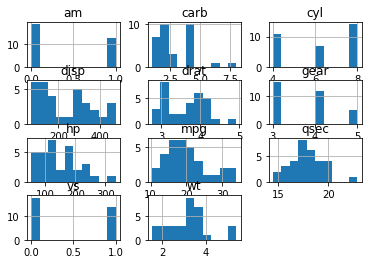

In [29]:
# create histogram for numeric data 
df.hist() 
  
# show plot 
plt.show() 

Index(['Cars', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb', 'mpg_level'],
      dtype='object')


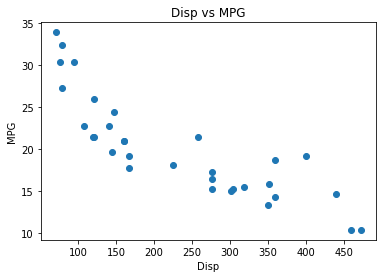

In [31]:
# Plotting data
_ = plt.scatter(df['disp'], df['mpg'])
_ = plt.xlabel('Disp')
_ = plt.ylabel('MPG')
_ = plt.title('Disp vs MPG')

# Printing keys
print(df.keys())

# Putting data in pandas dataframe
datapd = pd.DataFrame(df)

# Showing plot
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
data=df

In [36]:
lm = LinearRegression()                                             # Regression object created
datamt = np.matrix(data)                                            # Matrix of data made
lmFit = lm.fit(datamt[:,3], datamt[:,1])                            # Data fit
print('Coefficients: \n', lmFit.coef_, '    ', lmFit.intercept_)    # Coefficients shown

Coefficients: 
 [[-0.04121512]]      [29.59985476]


In [37]:
#Dapat dilihat bahwa kemiringannya -0.0412 dan titik potong dengan sumbu y adalah 29.5999, sehingga persamaan garisnya adalah mpg = -0.0412disp + 29.5999. Dengan demikian, hubungan antara mgp dan disp berbanding terbalik

In [38]:
lmm = LinearRegression()                                              # Regression object created
wtnp = np.array(data['wt'])                                           # wt variable in an array
cylnp = np.array(data['cyl'])                                         # cyl variable in an array
carbnp = np.array(data['carb'])                                       # carb variable in an array
npc = np.column_stack((cylnp, wtnp, carbnp))                          # Arrays connected into one frame
npcmt = np.matrix(npc)                                                # Connected array made into a matrix
lmFit2 = lmm.fit(npcmt, datamt[:,4])                                  # Fit created
print('Coefficients: \n', lmFit2.coef_, '    ', lmFit2.intercept_)    # Coefficients shown

Coefficients: 
 [[23.18269752  0.14411948 18.28279627]]      [-48.63947381]


In [39]:
#Model untuk multiple linear regressionnya adalah {hp = 23.1827cyl + 0.1441wt + 18.2828carb - 48.6395}. Jadi, hubungan hp dengan masing-masing cyl, lwt, dan carb berbanding lurus.

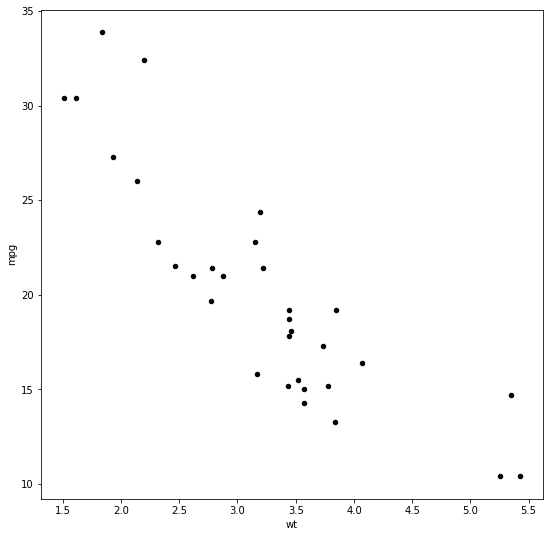

In [40]:
df.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

In [41]:
#Scatterplot menunjukkan hubungan linier yang kasar antara berat dan mpg, menunjukkan model regresi linier mungkin bekerja dengan baik.

In [43]:
mtcars=df
from sklearn import linear_model
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


In [44]:
#maka persamaan garisnya adalah mpg = 37.2851 - 5.3445 * wt

In [45]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.7528327936582646

In [46]:
#Output dari fungsi skor untuk regresi linier adalah "R-squared", nilai yang berkisar dari 0 hingga 1 yang menggambarkan proporsi varian dalam variabel respon yang dijelaskan oleh model. Dalam hal ini, berat mobil menjelaskan sekitar 75% dari varian dalam mpg.

#Ukuran R-squared didasarkan pada residual: perbedaan antara apa yang diprediksi model untuk setiap titik data dan nilai aktual dari setiap titik data. Kita dapat mengekstrak residu model dengan membuat prediksi dengan model pada data dan kemudian mengurangi nilai aktual dari setiap prediksi:

In [47]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -8.326673e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [48]:
#R-squared dihitung sebagai 1 - (SSResiduals / SSTotal) adalah SSResiduals yaitu jumlah kuadrat dari residual model dan SSTotal adalah jumlah kuadrat dari perbedaan antara setiap titik data dan rata-rata data. Kita bisa menghitung R-kuadrat dengan cara seperti ini:

In [49]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582646

In [50]:
#Sekarang setelah kita memiliki model linier, sehingga dapat kita plot garis yang cocok di scatterplot untuk mengetahui seberapa cocoknya dengan data:

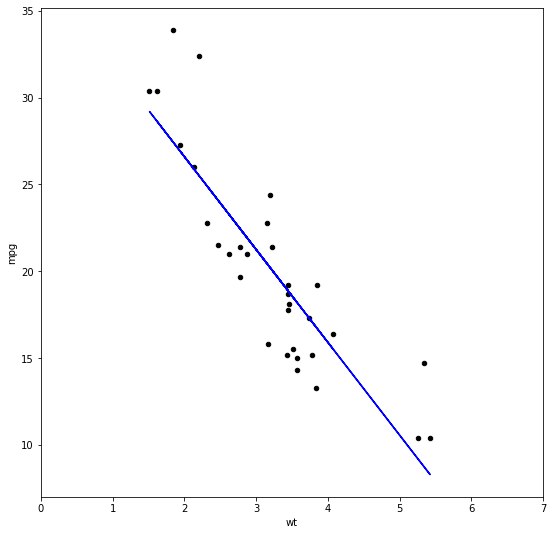

In [51]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

In [52]:
#Garis regresi terlihat masuk akal yaitu: seiring peningkatan berat mobil, diperkirakan ekonomi bahan bakar akan menurun.

#Pencilan dapat memiliki pengaruh besar pada model regresi linier: karena regresi berkaitan dengan meminimalkan residu kuadrat, residu besar memiliki pengaruh besar secara tidak proporsional pada model. 

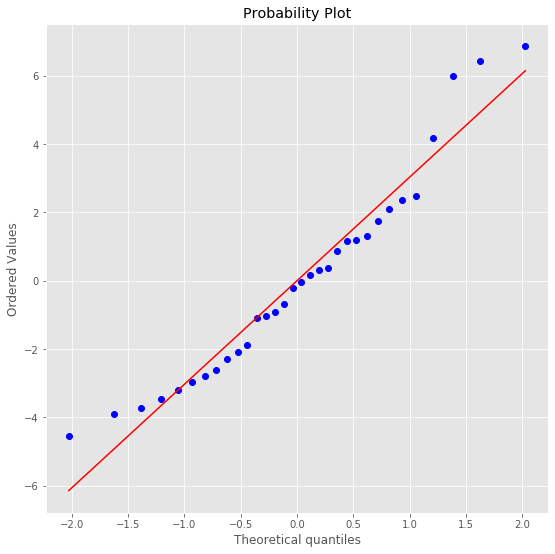

In [55]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

In [56]:
#Ketika residu terdistribusi secara normal, mereka cenderung berada di sepanjang garis lurus pada plot Q-Q. Dalam hal ini residu tampaknya mengikuti pola yang agak non-linier: residu agak jauh dari garis normalitas di setiap ujung. Ini merupakan indikasi bahwa garis lurus sederhana mungkin tidak cukup untuk sepenuhnya menggambarkan hubungan antara berat dan mpg.

In [57]:
#Nomor1

In [78]:
df=pd.read_csv("inflasi.csv")

In [79]:
df.dtypes

Month       object
inflasi    float64
dtype: object

In [81]:
df['inflasi'].mean()

0.06314723618090455

In [82]:
df['inflasi'].median()

0.0604

In [84]:
df.describe()

,inflasi
count,199.000000
mean,0.063147
std,0.033162
min,0.000000
25%,0.038550
50%,0.060400
75%,0.072850
max,0.183800


In [109]:
df['inflasi'].skew()

1.6514304546987901

In [86]:
df.shape

(199, 2)

In [103]:
dfmin1=df.iloc[:198]

In [106]:
dfmin1
#data dilakukan pembersihan dari nilai yang tidak masuk akal

,Month,inflasi
0,Juni 2019,0.0328
1,Mei 2019,0.0332
2,April 2019,0.0283
3,Maret 2019,0.0248
4,Februari 2019,0.0257
...,...,...
193,Mei 2003,0.0715
194,April 2003,0.0762
195,Maret 2003,0.0717
196,Februari 2003,0.0760


In [107]:
dfmin1.describe()

,inflasi
count,198.000000
mean,0.063466
std,0.032938
min,0.024100
25%,0.038875
50%,0.060500
75%,0.072975
max,0.183800


In [110]:
dfmin1['inflasi'].skew()

1.7006786015862911

In [111]:
#Dari analisis deskriptif di atas dapat disimpulkan, rata-rata inflasi di indonesia selama 17 tahun ke belakang adalah sebesar 6 persen, namun memiliki nilai maksimum yang sangat jauh yaitu 18 persen dan nilai minimum setelah data dibersihkan adalah 2 persen dengan penyebarannya sekitar 3 persen. Dapat dilihat juga kuartil pertama, kedua, dan ketiga dari program di atas.
#Dari skew, diperoleh kemencengan data lebih dari 1 sehingga dikatakan positive skewness artinya mean lebih besar dari median dan data menceng ke kanan dari kurva distribusi normal.

In [112]:
dfmin1['inflasi'].kurtosis()

3.1691253343656594

In [ ]:
# Karena nilai kurtosis positif serta jauh dari nol maka datanya bersifat runcing atau cenderung mengelompok (homogen).